# FIT5201: Assessment 1
## The Elements of Machine Learning

### Objectives
This assignment consists of three parts (A,B,C) that assess your understanding of model complexity, model selection, uncertainty in prediction with bootstrapping, and probabilistic machine learning. The total marks of this assessment is 100, and will contribute to the 20% of your final score. 

In [1]:
# information about the R kernel and machine used
sessionInfo()

R version 3.3.2 (2016-10-31)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 15063)

locale:
[1] LC_COLLATE=English_Australia.1252  LC_CTYPE=English_Australia.1252   
[3] LC_MONETARY=English_Australia.1252 LC_NUMERIC=C                      
[5] LC_TIME=English_Australia.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] R6_2.2.2            magrittr_1.5        IRdisplay_0.4.4    
 [4] pbdZMQ_0.2-6        tools_3.3.2         crayon_1.3.2       
 [7] uuid_0.1-2          stringi_1.1.5       IRkernel_0.8.7.9000
[10] jsonlite_1.5        stringr_1.2.0       digest_0.6.12      
[13] repr_0.12.0         evaluate_0.10.1    

In [2]:
# declare the libraries we will be using
library(reshape2)
library(ggplot2)
library(corrplot)

Warning message:
"package 'ggplot2' was built under R version 3.3.3"Warning message:
"package 'corrplot' was built under R version 3.3.3"

### Part A.  Model Complexity and Model Selection
In this part, you study the effect of model complexity on the training and testing errors.  You also demonstrate your programming skills by developing a regression algorithm and a cross-validation technique that will be used to select the models with the most effective complexity.

__Background__. A KNN regressor is similar to a KNN classifier (covered in Activity 1.1) in that it finds the K nearest neighbors and estimates the value of the given test point based on the values of its neighbours. The main difference between KNN regression and KNN classification is that KNN classifier returns the label that has the majority vote in the neighborhood, whilst KNN regressor returns the average of the neighbors’ values. 

#### Question 1 [KNN Regressor, 20 Marks] 
Q1-1) Implement the KNN regressor function:
                                     knn(train.data, train.label, test.data, K=3) 
which takes the training data and their labels (continuous values), the test set, and the size of the neighborhood (K). It should return the regressed values for the test data points. When choosing the neighbors, you can use the Euclidean distance function to measure the distance between a pair of data points. 

__Hint__: You are allowed to use KNN classifier code from Activity 1 of Module 1.

**Q1-1** 

For data analysis, the first and foremost step is exploring what the data looks like.

In [3]:
# read the train and test data
trainA.file <- read.csv("Task1A_train.csv")
testA.file <- read.csv("Task1A_test.csv")

print("Training Data")
head(trainA.file)
print("Testing Data")
head(testA.file)

[1] "Training Data"


x1,y
1960.0,0.71
1960.5,0.85
1961.0,0.61
1961.5,0.92
1962.0,0.72
1962.5,0.92


[1] "Testing Data"


x1,y
1960.25,0.63
1960.75,0.44
1961.25,0.69
1961.75,0.55
1962.25,0.77
1962.75,0.60


In here we can see both the input $x$ and target variable $t$. Machine learning always starts with these two types of variables, where the goal is to use all input variables to predict or infer target variables: $t = f(x)$. We also have two types of data,  **training** and **testing** data. The former is used to train the model we'll be creating, and the latter to test the effectiveness of that model.

Based on the results above we can see that we only have 1 **input variable** corresponding to another 1 **target variable**. Now we can divide them into both **data** (the *input variable*) and **value** (*the target variable*).

In [4]:
# get the first column of the data frames and rename them as "data"
trainA.dt <- as.data.frame(trainA.file[,1]) 
colnames(trainA.dt) <- c("data")

testA.dt <- as.data.frame(testA.file[,1])
colnames(testA.dt) <- c("data")

# get the last column of the data frame
trainA.vl <- trainA.file[,-1]
testA.vl <- testA.file[,-1]

In [5]:
# explore the data - how many rows does the training and testing have?
print(paste("number of training obs: ", nrow(trainA.dt)))
print(paste("number of testing obs: ", nrow(testA.dt)))

[1] "number of training obs:  42"
[1] "number of testing obs:  42"


Now we can define the KNN Regressor. Activity 1 implemented a **KNN Classifier**, wherein the target variable is a *label* or a discrete value (setosa, virginica, versicolor). In the assessment's case, since the target is a *continuous* variable a **KNN Regressor** is required.

**KNN Regressor** works similarly to a **KNN Classifier** in detecting the K nearest neighbours. The main difference is the prediction made by the classifier came from getting the *mode* (or the most frequent value within the neighbours) while the regressor gets the *mean* (the average of the values of the neighbours).

In [2]:
# parameters:
# train.data - a dataframe of training data (input variables)
# train.value - a dataframe of training values (target variable)
# test.data - a dataframe of testing data (input variables)
# K - the number of nearest neighbours
# distance - should be one of euclidean, maximum, manhattan, canberra, binary or minkowski
# KNN function
knn <- function(train.data, train.value, test.data, K=3, distance = 'euclidean'){
    ## count number of train samples
    train.len <- nrow(train.data)
    
    ## count number of test samples
    test.len <- nrow(test.data)
    
    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method = distance))[1:test.len, (test.len + 1):(test.len + train.len)]
    
    test.value <- c()
    
    ## for each test sample...
    for (i in 1:test.len){
        ### ...find its K nearest neighbours from training sampels...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K, 2]
        
        ###...and calculate the predicted labels according to the mean of the neighbours
        test.value[i]<- (round(mean(train.value[nn]), 2))
    }
    
    ## return the class labels as output
    return (test.value)
}

The following function defines the **root mean squared-error (RMSE)**. The **root mean squared-error** is a function that determines the difference between the model's predicted value $\widehat{Y_i}$, and the actual value $Y_i$ of the target variable. The difference is squared and the square root of the mean was taken to *normalise* the values of the errors.

$$
RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n} (\widehat{Y_i}-Y_i)^2}
$$

In Machine Learning, the goal is to minimise the error (or the difference) between the model's values and the corresponding target values of the test set, after the model has been trained from the training set.

In [7]:
# function to get the root mean squared-error (RMSE)
# parameters:
# predicted.values - a vector of predicted values
# actual.values - a vector of actual.values
get.rmse <- function(predicted.values, actual.values){
    p.length <- length(predicted.values)
    a.length <- length(actual.values)
    
    if (p.length == a.length){
        # square the errors (difference of predicted and actual)
        squared.errors <- (predicted.values - actual.values)^2
        
        # get the mean
        mean.squared.errors <- mean(squared.errors)
        
        # return the resulting square root
        return (sqrt(mean.squared.errors))
    }
    else{
        stop("Both numeric vectors must be equal!")
    }
}

In [8]:
# test if the get.rmse is working as intended
a <- c(2,3,4,5)
b <- c(6,7,4,5)

get.rmse(a, b)

[1] 2.828427

**Q1-2**

Q1-2) Plot the training and the testing errors versus 1/K for K=1,..,20 in one plot, using the Task1A_train.csv and Task1A_test.csv datasets provided for this assignment. 

The following code just gets the RMSE of the model made from implementing the KNN algorithm (code based from Acitivity 1).

In [9]:
miss <- data.frame('K' = 1:20, 'train' = rep(0,20), 'test' = rep(0,20))

# for each K
for (k in 1:20){
    # get the error when the training and the testing data both came from the "training" set
    miss[k, 'train'] <- round(get.rmse(knn(trainA.dt, trainA.vl, trainA.dt, K=k), trainA.vl), 2)
    
    # get the error when the testing data came from the "testing" set
    miss[k, 'test'] <- round(get.rmse(knn(trainA.dt, trainA.vl, testA.dt, K=k), testA.vl), 2)
}

It's time to check the errors to determine the most optimal K. In this case, the most optimal K is the one with the *least* testing errors. This means that the model was able to predict a value that is *almost similar* to the actual target variable. 

In [10]:
# check the result
miss

K,train,test
1,0.00,1.30
2,0.35,1.46
3,0.31,1.30
4,0.39,1.36
5,0.40,1.17
6,0.53,1.21
7,0.66,1.04
8,0.79,1.09
9,0.95,0.98
10,1.08,1.02


Based from the results, the most optimal value for K is **11**.

To be able to see the trend of errors, refer to the next plot:

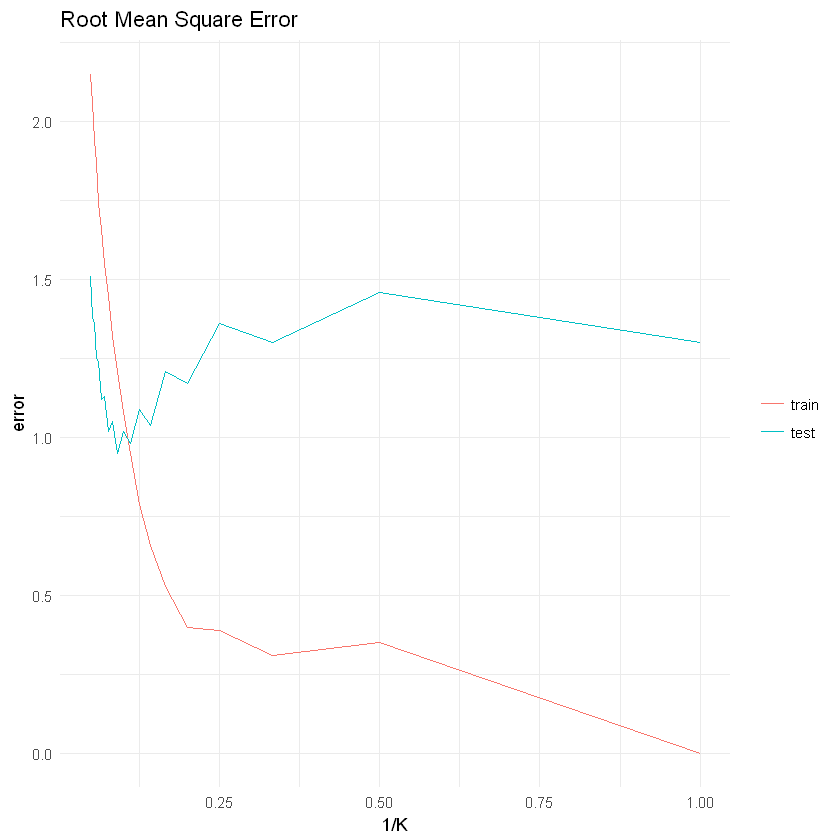

In [11]:
# plot misclassification errors for train and test data sets
miss.m <- melt(miss, id='K') # reshape for visualization
names(miss.m) <- c('K', 'type', 'error')
ggplot(data=miss.m, aes(x=1/K, y=error, color=type)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Root Mean Square Error")

**Q1-3**

Q1-3)Report the best value for K in terms of the testing error. Discuss the values of K corresponding to underfitting and overfitting based on your plot in the previous sub-question, Q1-2.

**Answer**

The main goal of machine learning is *mathematical optimisation*--that is, minimising the error function.

Therefore, the optimal K brings out the least amount of testing errors (in this case the *root mean squared-errors*), which is when **K = 11** (0.95). It's nice to note that **K = 9 and K = 10** gives out some pretty low errors as well (0.98 and 1.02 respectively).

An overfitted model is a model where K is at the lowest because it becomes too restrictive; it just relies on a single neighbour to determine the target variable of a point. Thus, it is when **K = 1**. Also note that overfitting *in general* happens when the **training error = 0**, which is also when **K = 1.** Looking at the plot and the errors, it is overfitted when **K = 1 to 4**, with all of the errors >= 1.30. The model is still too restrictive for the data even with K = 2 to 4.

On the other hand, an underfitted model is a model where K is at a very high value (**K = number of variables**) because K becomes too flexible; the resulting prediction will just come from a few set of values. When **K = N**, the model produces only a single predicted value--the average of all the points. Looking at the plot, it can easily be seen as **K = 16 and above**, with all of the errors >= 1.20.

Both underfitted and overfitted models give out high testing errors.

#### Question 2 [K-fold Cross Validation, 20 Marks] 
Q2-1) Implement a K-fold Cross Validation (CV) function for your KNN regressor:  
       cv(train.data, train.label, numFold=10) 
which takes the training data and their labels (continuous values), the number of folds, and returns errors for different folds of the training data. 

__Hint__: you are allowed to use bootstrap code from Activity 2 of Module 1.

**Q2-1**

First, implemented a method that divides the dataset into **K-folds**.

This method divides the dataset into **K** equal-sized distinct subsets, and use  one of these subsets for *testing* while the other **K-1** subsets for *training*. The method is repeated K times until every subset has been used for testing, and the resulting error comes from the average of all the errors computed per Kth iteration. This ensures that every observation has been used for both training and testing purposes.

In [12]:
# parameters:
# train.data - a dataframe of data
# numFold - the k in K-fold
# returns: 
create_folds <- function(train.data, numFold = 10){
    
    # shuffle the indices
    shuffled.indices <- sample(nrow(train.data), nrow(train.data), replace = FALSE)
    shuffled.indices
    
    # get the number of elements per K, take care of the remainder
    k.length <- round(nrow(train.data)/numFold)
    k.length.remainder <- nrow(train.data)%%numFold

    remainder.counter <- 1
    start <- 1

    folds <- array(list(), numFold)

    # divide the indices per fold
    for (j in 1:numFold){
        stop <- start + k.length - 1
        
        # take care of the remainder; distribute them to the initial folds
        if (remainder.counter <= k.length.remainder) {
            stop <- stop + 1
            remainder.counter <- remainder.counter + 1
        } 

        # pass the list of shuffled indices
        elements <- shuffled.indices[start:stop]
        folds[[j]] <- as.list(elements)

        start <- stop + 1
    }
        
    return(folds)
}

The function below defines the cross-validation proper. It uses the *create_folds()* function defined earlier to distribute the dataset into K-folds, then implements KNN per fold. The resulting errors are then recorded and then returned.

In [14]:
# parameters:
# train.data - a dataframe of data (input variables)
# train.label - a dataframe of values (target variable)
# numFold - the k in K-fold
# maxK - the maximum K of KNN (minimum is always 1)
cv <- function(train.data, train.label, numFold = 10, maxK = 20){
    K <- maxK
    
    # create a matrix of errors, where the row indicates K
    # and the column indicates the fold 
    errors <- matrix(nrow = K, ncol = numFold + 1)
    
    # set the first column values as "index"
    errors[,1] <- c(1:K)

    # divide the dataset into K-folds
    f <- create_folds(train.data, numFold)
    
    # split per fold into testing and training subgroups
    for (i in 1:numFold) {

        # generate test group indices - test group is the ith fold
        test.indices <- c()
        for (k in 1:length(f[[i]])){
            test.indices <- c(test.indices, f[[i]][[k]])
        }

        train.indices <- c()

        # generate the train group indices for the remaining folds
        for(j in 1:numFold) {
            if (j != i) {
                for (k in 1:length(f[[j]])){
                    train.indices <- c(train.indices, f[[j]][[k]])
                }
            }
        }

        # retrieve the data and labels
        trn.dt <- train.data[train.indices,]
        trn.vl <- train.label[train.indices]

        tst.dt <- train.data[test.indices,]
        tst.vl <- train.label[test.indices]

        # convert to data frame
        trn.df <- as.data.frame(trn.dt) 
        colnames(trn.df) <- c("data")

        tst.df <- as.data.frame(tst.dt)
        colnames(tst.df) <- c("data")

        # generate the errors per K
        for (k in 1:K){
            errors[k, i + 1] <- get.rmse(knn(trn.df, trn.vl, tst.df, k, 'euclidean'), tst.vl)
        }

    }

    return (errors)   
}

**Q2-2**

Q2-2) Using the training data, run your K-fold CV where the numFold is set to 10. Change the value of K=1,..,20 and for each K compute the average 10 error numbers you have got.  Plot the average error numbers versus 1/K for K=1,..,20. Further, add two dashed lines around the average error indicating the average +/- standard deviation of errors. Include the plot in your report. 

Using the matrix **result** that came from the *cv()* method, create a new data.frame the computes the average values of the folds per K. This will be the final RMSE per K, and will be used to determine the optimum model.

In [16]:
# declare a matrix of the mean RMSE, RMSE + sd, RMSE - sd
ave.errors <- data.frame('K' = 1:20, 'RMSE' = rep(0,20), 'plus.SD' = rep(0,20), 'minus.SD' = rep(0,20))

for (i in 1:nrow(result)){
    ave.errors[i, 'RMSE'] <- mean(result[i, 2:ncol(result)])
    ave.errors[i, 'plus.SD'] <- mean(result[i, 2:ncol(result)]) + sd(result[i, 2:ncol(result)])
    ave.errors[i, 'minus.SD'] <- mean(result[i, 2:ncol(result)]) - sd(result[i, 2:ncol(result)])
}


K,RMSE,plus.SD,minus.SD
1,0.6666252,0.9683018,0.3649486
2,0.5863092,0.8959891,0.2766293
3,0.4451225,0.6693854,0.2208595
4,0.5242669,0.8486838,0.1998501
5,0.5351558,0.9406435,0.1296680
6,0.6769351,1.1712122,0.1826581
7,0.7916834,1.4233227,0.1600440
8,0.9174916,1.6246256,0.2103575
9,0.9699439,1.8386158,0.1012721
10,1.1358160,2.0308027,0.2408292


In [17]:
# reshape for visualization
ave.errors.m <- melt(ave.errors, id ='K')
names(ave.errors.m ) <- c('K', 'type', 'error')

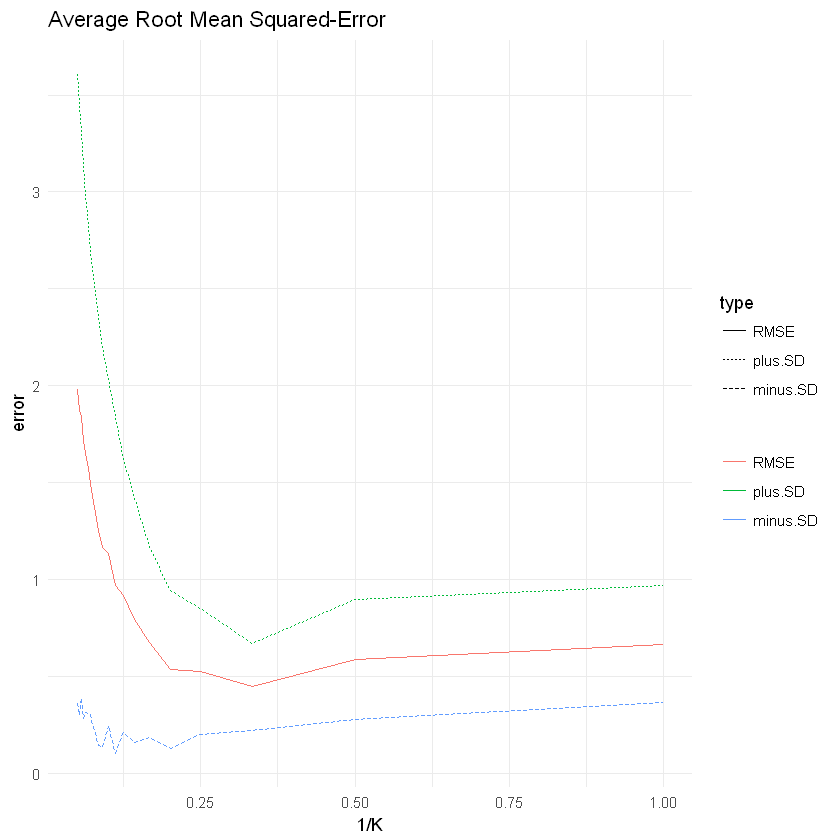

In [19]:
# plot the missclassification error and the errors +/- sd
ggplot(data=ave.errors.m, aes(x=1/K, y=error, group=type, colour = type)) + 
        geom_line(aes(linetype=type, color=type)) +
        scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
        ggtitle("Average Root Mean Squared-Error")

**Q2-3**

Q2-3) Report the values of K that result to minimum average error and minimum standard deviation of errors based on your cross validation plot in the previous sub-question, Q2-2. 

**Answer**

Based from the resulting errors, the optimal K would be **K = 2 or 3**, because it has both the smallest errors and standard deviation. I chose 2 *or* 3 because in some of my runs the optimal K was 2, whereas in some runs it was 3. As shown from the graph, **K = 2 or 3** is where the *bottleneck* is, which means the error and standard deviation are the smallest compared to most Ks.

The model does not really present a high level of error when *considered* overfitted at **K = 1**, which means overfitting is not a risk; both the error and the standard deviation when K = 1 can still be considered low. However, major underfitting occurs when the model selected is at **K = 6 and above**, with huge root mean squared-errors and standard deviations. 

Looking at the graph from right to left, it really starts at a low error and standard deviation, but the gap widens after K = 6, and the error becomes very high. This means that the data is more prone to underfitted models.

### Part B. Prediction Uncertainty with Bootstrapping
This part is the adaptation of Activity 2 from KNN classification to KNN regression. You use the bootstrapping technique to quantify the uncertainty of predictions for the KNN regressor that you implemented in Part A. 

#### Question 3 [Bootstrapping, 20 Marks]
Q3-1) Modify the code in Activity 2 to handle bootstrapping for KNN regression. 

There's no need to modify the *boot()* function in Acitivity 2. The main modification is just to call the modified *knn()* method to do regression and *get.rmse()* to measure the error.


Q3-2)Load Task1B_train.csv and Task1B_test.csv sets. Apply your bootstrapping for KNN regression with times = 100 (the number of subsets), size = 25 (the size of each subset), and change K=1,..,20 (the neighbourhood size). Now create a boxplot where the x-axis is K, and the y-axis is the average error (and the uncertainty around it) corresponding to each K. 

**Answer**

This part of the assessment introduces **bootstrapping**. Bootstrapping is another way of quantifying uncertainty. It divides the dataset into N bootstraps of equal sizes, where each bootstrap contains an element that is selected from the dataset *with replacement*. This produces a "distribution over the maximum likelihood estimates for the parameters" (Haffari, 2017).

The bootstrapping method below is taken from the Alexandria Material "The Elements of Machine Learning" by Haffari, G. 

In [8]:
# parameters:
# original.size = size of the data being bootstrapped
# sample.size = size (number of elements) per bootstrap
# times = the number of bootstraps generated
boot <- function (original.size=100, sample.size=original.size, times=100){
    # create a matrix of bootstrapped indices
    # per row is a bootstrap (or K)
    # per column is an index of an element in that bootstrap
    indx <- matrix(nrow=times, ncol=sample.size)
    for (t in 1:times){
        indx[t, ] <- sample(x=original.size, size=sample.size, replace = TRUE)
    }
    return(indx)
}

To test the boostrapping method, a new dataset will be used.

In [3]:
# read the train and test data
trainB.file <- read.csv("Task1B_train.csv")
testB.file <- read.csv("Task1B_test.csv")

Initial exploration of the data is performed.

In [1]:
head(trainB.file)
head(testB.file)

ERROR: Error in head(trainB.file): object 'trainB.file' not found


The new datasets have four different input variables $x_1, x_2, x_3, x_4$ and one target variable $y$. Looks like this dataset is larger with 930 observations each.

Now it's time to separate the input variables ("data") from the target variables ("value"). The data will consist of columns 1 to 4, while the value contains the fifth column.

In [5]:
# strip the fifth column
trainB.dt <- as.data.frame(trainB.file[,-5]) 

# strip the fifth column
testB.dt <- as.data.frame(testB.file[,-5])

# get the fifth column
trainB.vl <- trainB.file[,5]

# get the fifth column
testB.vl <- testB.file[,5]

x1,x2,x3,x4
1991.496,1628.75,1678.1,1772.8
1991.504,1606.51,1678.6,1718.0
1991.512,1618.16,1686.6,1723.1
1991.519,1630.75,1682.9,1734.5
1991.527,1635.47,1697.5,1754.0
1991.535,1647.84,1723.8,1759.8


x1,x2,x3,x4
1991.500,1613.63,1688.5,1750.5
1991.508,1621.04,1684.1,1708.1
1991.515,1610.61,1671.6,1714.3
1991.523,1640.17,1703.6,1757.4
1991.531,1645.89,1716.3,1754.3
1991.538,1638.35,1730.5,1755.5


[1] 2443.6 2448.2 2484.7 2487.9 2510.5 2532.5

[1] 2460.2 2470.4 2466.8 2508.4 2497.4 2556.8

Now that we have separated the data from training, we can now implement bootstrapping for the training data. The bootstraps will then be used to create and test the model from KNN. Note that due to the huge number of datasets, the following code will need a few minutes  to execute.

In [14]:
trainB.vl[indx]

[1] 2845.9 3716.3 2415.6 3016.3 2844.4 4576.2 3050.6 3006.1 3055.8 2348.0

In [13]:
typeof(trainB.vl[indx])

[1] "double"

In [9]:
boot.indx <- boot(nrow(trainB.dt), 10, 3)
 indx <- boot.indx[1,]
knn(trainB.dt[indx, ], trainB.vl[indx], testB.dt, K = 1)

[1] 2348.0 2348.0 2348.0 2348.0 2348.0 2348.0 2348.0 2348.0 2348.0 2348.0
 [11] 2348.0 2348.0 2348.0 2348.0 2348.0 2348.0 2415.6 2348.0 2348.0 2348.0
 [21] 2348.0 2415.6 2415.6 2415.6 2348.0 2348.0 2348.0 2348.0 2348.0 2348.0
 [31] 2348.0 2348.0 2348.0 2348.0 2348.0 2348.0 2348.0 2348.0 2348.0 2348.0
 [41] 2348.0 2348.0 2348.0 2348.0 2348.0 2348.0 2348.0 2348.0 2348.0 2348.0
 [51] 2348.0 2348.0 2348.0 2348.0 2348.0 2348.0 2348.0 2348.0 2348.0 2348.0
 [61] 2348.0 2348.0 2348.0 2348.0 2348.0 2348.0 2348.0 2348.0 2348.0 2348.0
 [71] 2348.0 2415.6 2415.6 2415.6 2415.6 2415.6 2415.6 2415.6 2415.6 2415.6
 [81] 2415.6 2415.6 2415.6 2415.6 2415.6 2415.6 2415.6 2415.6 2415.6 2415.6
 [91] 2415.6 2415.6 2415.6 2415.6 2415.6 2415.6 2415.6 2415.6 2415.6 2415.6
[101] 2415.6 2415.6 2415.6 2415.6 2415.6 2415.6 2415.6 2415.6 2415.6 2415.6
[111] 2415.6 2415.6 2415.6 2415.6 2415.6 2415.6 2415.6 2415.6 2415.6 2415.6
[121] 2415.6 2415.6 2415.6 2415.6 2415.6 2415.6 2415.6 2415.6 2415.6 2415.6
[131] 2415.6 2415.6 2415.6 2415.6 2415.6 2415.6 2415.6 2415.6 2348.0 2348.0
[141] 2348.0 2415.6 2348.0 2415.6 2415.6 2348.0 2348.0 2348.0 2348.0 2348.0
[151] 2348.0 2348.0 2348.0 2348.0 2348.0 2348.0 2348.0 2415.6 2415.6 2415.6
[161] 2415.6 2415.6 2348.0 2348.0 2348.0 2348.0 2348.0 2348.0 2348.0 2348.0
[171] 2348.0 2348.0 2415.6 2348.0 2348.0 2348.0 2348.0 2415.6 2348.0 2415.6
[181] 2348.0 2348.0 2348.0 2348.0 2348.0 2415.6 2415.6 2415.6 2415.6 2348.0
[191] 2348.0 2415.6 2415.6 2844.4 2844.4 2844.4 2844.4 2844.4 2844.4 2844.4
[201] 2844.4 2844.4 2844.4 2844.4 2844.4 2844.4 2844.4 2844.4 2844.4 2844.4
[211] 2844.4 2844.4 2844.4 2844.4 2844.4 2844.4 2844.4 2844.4 2844.4 2844.4
[221] 2844.4 2844.4 2844.4 2844.4 2844.4 2844.4 2844.4 2844.4 2844.4 2844.4
[231] 2844.4 2844.4 2844.4 2844.4 2844.4 2844.4 2844.4 2844.4 2844.4 2844.4
[241] 2844.4 2844.4 2844.4 2844.4 2844.4 2844.4 2844.4 2844.4 2844.4 2844.4
[251] 2844.4 2844.4 2844.4 2844.4 2844.4 2844.4 2844.4 2844.4 2844.4 2844.4
[261] 2845.9 2845.9 2844.4 2845.9 2845.9 2845.9 2845.9 2845.9 2845.9 2845.9
[271] 2845.9 2845.9 3006.1 3006.1 3006.1 3006.1 3006.1 3006.1 3006.1 3006.1
[281] 3006.1 3006.1 3006.1 3006.1 3006.1 3006.1 3006.1 3006.1 3006.1 3006.1
[291] 3006.1 3006.1 3006.1 3006.1 3006.1 3006.1 3006.1 3006.1 3006.1 3016.3
[301] 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3
[311] 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3
[321] 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3716.3 3016.3 3716.3
[331] 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3716.3 3716.3 3716.3
[341] 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3
[351] 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3
[361] 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3
[371] 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3
[381] 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3055.8 3055.8 3055.8
[391] 3055.8 3055.8 3055.8 3055.8 3055.8 3055.8 3055.8 3055.8 3016.3 3016.3
[401] 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3055.8 3016.3 3055.8
[411] 3055.8 3055.8 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3055.8 3055.8
[421] 3055.8 3055.8 3055.8 3055.8 3055.8 3055.8 3050.6 3055.8 3055.8 3055.8
[431] 3055.8 3055.8 3050.6 3050.6 3055.8 3055.8 3055.8 3055.8 3055.8 3055.8
[441] 3055.8 3055.8 3055.8 3055.8 3055.8 3055.8 3055.8 3055.8 3055.8 3055.8
[451] 3055.8 3055.8 3055.8 3055.8 3016.3 3016.3 3055.8 3055.8 3055.8 3055.8
[461] 3055.8 3055.8 3055.8 3055.8 3055.8 3050.6 3055.8 3050.6 3055.8 3055.8
[471] 3055.8 3055.8 3055.8 3055.8 3055.8 3055.8 3055.8 3055.8 3055.8 3055.8
[481] 3050.6 3050.6 3050.6 3050.6 3050.6 3050.6 3050.6 3050.6 3050.6 3050.6
[491] 3055.8 3055.8 3055.8 3055.8 3055.8 3055.8 3055.8 3055.8 3055.8 3055.8
[501] 3055.8 3055.8 3055.8 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3
[511] 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3
[521] 3016.3 3016.3 3016.3 3016.3 3016.3 3016.3 30

In [24]:
# fix the parameters
K <- 20           # Maximum K for KNN 
L <- 100          # number of datasets
N <- 25           # size of datasets

# generate bootstrap indices:
boot.indx <- boot(nrow(trainB.dt), N, L)

# a dataframe to track the number of missclassified samples in each case
bs.miss <- data.frame('K'=1:K, 'L'=1:L, 'test'=rep(0,L*K))

# THIS MAY TAKE A FEW MINUTES TO COMPLETE
## for every k values:
for (k in 1: K){
    
    ### for every dataset sizes:
    for (l in 1:L){
        
        #### calculate iteration index i
        i <- (k-1)*L+l
        
        #### save sample indices that were selected by bootstrap
        indx <- boot.indx[l,]
        
        #### save the value of k and l
        bs.miss[i, 'K'] <- k
        bs.miss[i, 'L'] <- l
        
        #### calculate and record the train and test missclassification rates
        bs.miss[i, 'test'] <- get.rmse(knn(trainB.dt[indx, ], trainB.vl[indx], testB.dt, K = k), testB.vl)
    } 
}

Checking the result of bootstrapping:

In [25]:
# check the result of bootstrapping
bs.miss

K,L,test
1,1,178.7266
1,2,165.2382
1,3,161.2250
1,4,177.8648
1,5,238.1653
1,6,160.7215
1,7,173.4057
1,8,273.5447
1,9,203.4576
1,10,164.4781


We can now use it to graph the errors and check for any patterns.

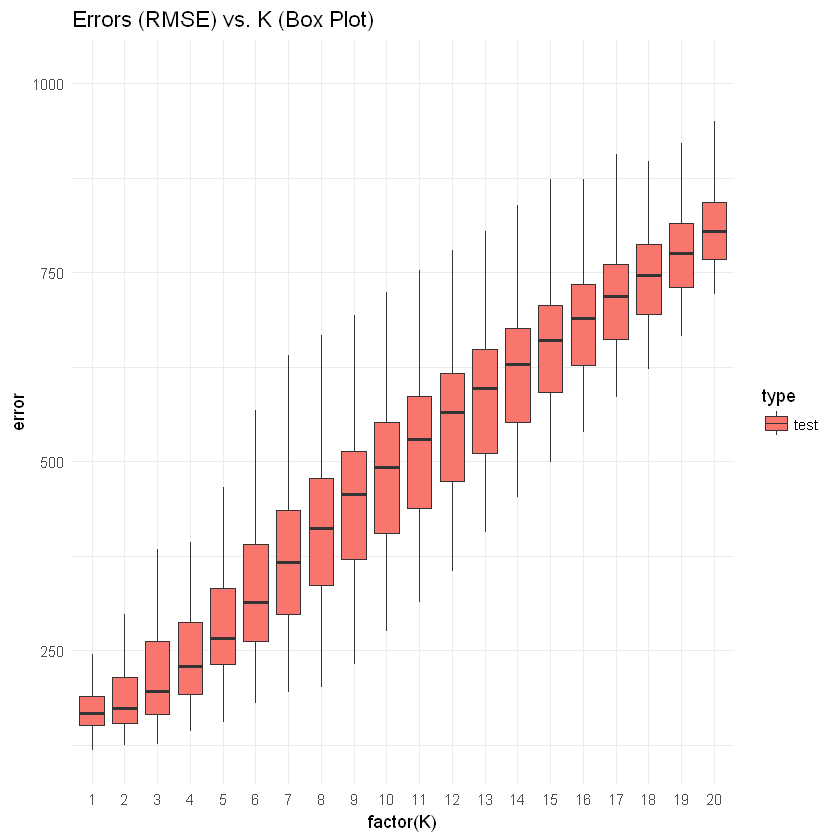

In [26]:
# plot misclassification percentage for train and test data sets
bs.miss.m <- melt(bs.miss, id=c('K', 'L')) # reshape for visualization
names(bs.miss.m) <- c('K', 'L', 'type', 'error')
ggplot(data=bs.miss.m[bs.miss.m$type=='test',], aes(factor(K), error,fill=type)) + geom_boxplot(outlier.shape = NA)  + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('Errors (RMSE) vs. K (Box Plot)') + theme_minimal()
# ignore the warnings (because of ignoring outliers)
options(warn=-1)

**Q3-3**

Q3-3) Based on your plot in the previous sub-question, Q3-2, how does the test error and its uncertainty behave as K increases? 

**Answer**

The errors and uncertainty tend to **increase** as K increases. As shown from the graph, the maximum error increases from around ~250 when K = 1 to ~900 when K = 20.

The variance among errors can also be seen in the boxplot. There is very little variance among errors when K is too small (1 to 2) and K is too large (19 to 20). However, the variance is at all time high when K is at the middle K = 10.

Q3-4) Load Task1B_train.csv and Task1B_test.csv sets. Apply your bootstrapping for KNN regression with K=10 (the neighbourhood size), size = 25 (the size of each subset), and change times = 10, 20, 30,.., 200 (the number of subsets). Now create a boxplot where the x-axis is ‘times’, and the y-axis is the average error (and the uncertainty around it) corresponding to each value of ‘times’.  

In [15]:
L <- c(10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200) # number of datasets
sum(L)

[1] 2100

In [27]:
# fix the parameters
K <- 10
L <- c(10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200) # number of datasets
N <- 25          # size of datasets

# a dataframe to track the number of missclassified samples in each case
times.miss <- data.frame('L'= rep(0, 2100),'index'=rep(0, 2100),'test'=rep(0,2100))

i <- 0
                   
### for every dataset sizes:
for (l in L){
    # generate bootstrap indices:
    boot.indx <- boot(nrow(trainB.dt),N,l)
    rmse <- c()
    
    # for every bootstrap
    for (j in 1:l){
        i <- i + 1
        #### save sample indices that were selected by bootstrap
        indx <- boot.indx[j,]
        
        #### save the value of l and j (bootstrap element index)
        times.miss[i,'L'] <- l 
        times.miss[i,'index'] <- j
        
        # get the RMSE
        rmse <- get.rmse(knn(trainB.dt[indx,],trainB.vl[indx],testB.dt,K=k),testB.vl)
        times.miss[i,'test'] <- rmse
    }
} 


In [28]:
# explore the result of bootstrapping
head(times.miss, 100)
nrow(times.miss)

# check the values of the test errors
times.miss[1500:1600,]

L,index,test
10,1,851.0804
10,2,774.8379
10,3,772.6149
10,4,883.9133
10,5,784.3907
10,6,818.8062
10,7,729.2418
10,8,791.5768
10,9,790.6785
10,10,745.9502


[1] 2100

,L,index,test
1500,170,140,873.3036
1501,170,141,900.3430
1502,170,142,769.4254
1503,170,143,788.6857
1504,170,144,806.9222
1505,170,145,753.7217
1506,170,146,817.1295
1507,170,147,735.1616
1508,170,148,865.3539
1509,170,149,819.5086


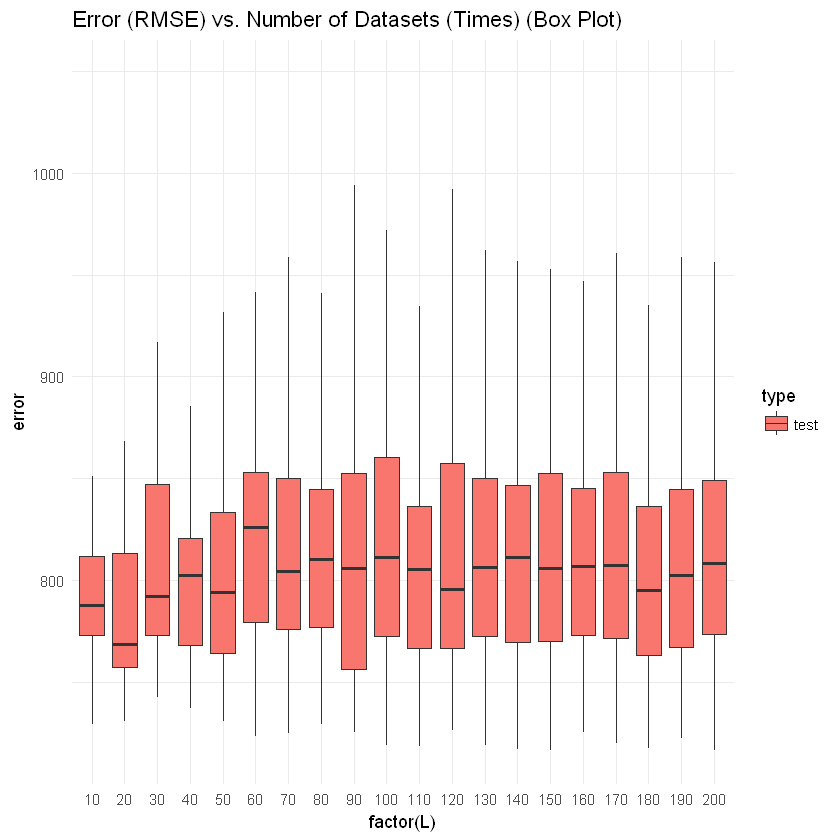

In [29]:
# plot the resulting errors per number of bootstraps
times.miss.m <- melt(times.miss, id=c('L')) # reshape for visualization
names(times.miss.m) <- c('L', 'type', 'error')
ggplot(data=times.miss.m[times.miss.m$type=='test',], aes(factor(L), error,fill=type)) + geom_boxplot(outlier.shape = NA)  + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('Error (RMSE) vs. Number of Datasets (Times) (Box Plot)') + theme_minimal()


**Q3-5**


Q3-5) Based on your plot in the previous sub-question, Q3-4, how does the test error and its uncertainty behave as the number of subsets in bootstrapping increases? 

**Answer**

As the number of bootstraps increase, **the errors tend to be stable and not deviate too much from each other.** Since bootstrapping is a way to quantify the uncertainty, it shows that as the number of bootstraps become larger the likelihood of getting the average error of the model becomes more apparent. The value of the probability of getting the data given the model $P(D\mid Model)$ becomes more apparent. 

### Part C. Probabilistic Machine Learning
In this part, you show your knowledge about the foundation of the probabilistic machine learning (i.e. probabilistic inference and modeling) by solving two simple but basic statistical inference problems. Solve the following problems based on the probability concepts you have learned in Module 1 with the same math conventions. Please show your work in your report. Also, there are two conceptual questions.

#### Question 4 [Bayes Rule, 20 Marks] 
Recall the simple example from Appendix A of Module 1. Suppose we have one red and one blue box. In the red box we have 2 apples and 6 oranges, whilst in the blue box we have 3 apples and 1 orange. Now suppose we randomly selected one of the boxes and picked a fruit. If the picked fruit is an apple, what is the probability that it was picked from the blue box?

Note that the chance of picking the red box is 40% and the selection chance for any of the pieces from a box is equal for all the pieces in that box.

**Answer**

$\text{Recall Baye's Theorem:} \\$
$$
P(A\mid B) = \frac{P(B\mid A)P(A)}{P(B)}
$$


$
\text{Let:}\\ \\
P(B=red) - \text{probability that it was picked from the red box} \\
P(B=blue) - \text{probability that it was picked from the blue box} \\
P(F=apple) - \text{probability that the fruit picked was an apple} \\
P(F=orange) - \text{probability that the fruit picked was an orange} \\
$

$
P(B=red) = 0.4\\
P(B=blue) = 0.6 \\
P(F=apple\mid B=blue) = 0.75 \\
P(F=orange\mid B=blue) = 0.25 \\
P(F=apple\mid B=red) = 0.25 \\
P(F=orange\mid B=red) = 0.75
$

$
P(B=blue\mid F=apple) = \frac{P(F=apple\mid B=blue)P(B=blue)}{P(F=apple)} \\
$

$
P(B=blue\mid F=apple) = \frac{P(F=apple\mid B=blue)P(B=blue)}{P(F=apple\mid B=blue)P(B=blue) + P(F=apple\mid B=blue)P(B=red)} \\
$

$
P(B=blue\mid F=apple) = \frac{(0.75)(0.6)}{(0.75)(0.6) + (0.25)(0.4)}
$

$
P(B=blue\mid F=apple) = 0.8182
$

#### Question 5 [Maximum Likelihood, 20 Marks] 
As opposed to a coin which has two faces, a dice has 6 faces. Suppose we are given a dataset which contains the outcomes of 10 independent tosses of a dice: D:={1,4,5,3,1,2,6,5,6,6}. We are asked to build a model for this dice, i.e. a model which tells what is the probability of each face of the dice if we toss it. Using the maximum likelihood principle, please determine the best value for our model parameters.

Hint: You can use a multinomial distribution with 6 probability parameters, each of which corresponding to a dice face (as opposed to coin where there are two parameters). You need to form the likelihood objective function, and then maximise it by setting the derivative with respect to the parameters to zero. Since the probabilities must sum up to 1, you only need to maximise the likelihood objective with respect to five parameters; the value of the sixth parameter is then going to be one minus the sum of the other parameters.


$\text{Let:} \\
X = \{1,2,3,4,5,6\} \ \ \ \text{Domain of the random variable X} \\
D = \{1,4,5,3,1,2,6,5,6,6\} \ \ \  \text{Observed data} \\
\newcommand{\Lagr}{\mathcal{L}}
$

$
\text{Let the following be the parameters:}\\
a = \text{probability of getting a 1} \\
b = \text{probability of getting a 2} \\
c = \text{probability of getting a 3} \\
d = \text{probability of getting a 4} \\
e = \text{probability of getting a 5} \\
1-a-b-c-d-e = \text{probability of getting a 6} \\
$

$
\text{Therefore,} \\
P(X=1) = a \\
P(X=2) = b \\
P(X=3) = c \\
P(X=4) = d \\
P(X=5) = e \\
P(X=6) = 1-a-b-c-d-e \\
$

$
\text{We are interested in finding,}\\
P(D\mid dice\ model) = \prod\limits_{i=1}^{10} p(x_i\mid die\ model) = a^2bcde^2(1-a-b-c-d-e)^3 \\
$

$
\text{Doing Maximum Likelihood Estimation,}\\
\frac{\partial \Lagr }{\partial a} = 0, \frac{\partial \Lagr }{\partial b} = 0, \frac{\partial \Lagr }{\partial c} = 0, \frac{\partial \Lagr }{\partial d} = 0, \frac{\partial \Lagr }{\partial e} = 0\\
\begin{align}\\
\frac{\partial \Lagr }{\partial a} = \frac{\partial[2\log a+3\log(1-a-b-c-d-e)]}{\partial a} = 0 \\ \\
\frac{\partial \Lagr }{\partial b} = \frac{\partial[\log b+3\log(1-a-b-c-d-e)]}{\partial b} = 0 \\ \\
\frac{\partial \Lagr }{\partial c} = \frac{\partial[\log c+3\log(1-a-b-c-d-e)]}{\partial c} = 0 \\ \\
\frac{\partial \Lagr }{\partial d} = \frac{\partial[\log d+3\log(1-a-b-c-d-e)]}{\partial d} = 0 \\ \\ 
\frac{\partial \Lagr }{\partial e} = \frac{\partial[2\log e+3\log(1-a-b-c-d-e)]}{\partial e} = 0 \\ \\
\end{align}
$

$
\begin{align}
\frac{2}{a}-\frac{3}{1-a-b-c-d-e} = 0 \\
\frac{1}{b}-\frac{3}{1-a-b-c-d-e} = 0 \\
\frac{1}{c}-\frac{3}{1-a-b-c-d-e} = 0 \\
\frac{1}{d}-\frac{3}{1-a-b-c-d-e} = 0 \\
\frac{2}{e}-\frac{3}{1-a-b-c-d-e} = 0 \\
\end{align}
$


$
\\
\text{Therefore,} \\
\begin{align}
\frac{2}{a} = \frac{1}{b} = \frac{1}{c} = \frac{1}{d} = \frac{2}{e} = \frac{3}{1-a-b-c-d-e}\\
\end{align}
$

$
\text{In terms of }a\text{,}\\
b = \frac{a}{2},\ c = \frac{a}{2},\ d = \frac{a}{2},\ e = a \\
$

$
\text{Solving for }a\text{:}\\
\begin{align}
\frac{2}{a} = \frac{3}{1-a-\frac{a}{2}-\frac{a}{2}-\frac{a}{2}-a}\\
\end{align}
$


$
\begin{align}
\frac{2}{a} = \frac{3}{1-2a-\frac{3a}{2}}
\end{align}
$

$
2(1-2a-\frac{3a}{2}) = 3a\\
2-4a-3a = 3a\\
2 = 10a\\
a = \frac{2}{10}\\
b = \frac{1}{10}\\
c = \frac{1}{10}\\
d = \frac{1}{10}\\
e = \frac{2}{10}
\\
$

$
\text{Final Answer:}\\
P(X=1) = a = \frac{2}{10}\\
P(X=2) = b = \frac{1}{10}\\
P(X=3) = c = \frac{1}{10}\\
P(X=4) = d = \frac{1}{10}\\
P(X=5) = e = \frac{2}{10}\\
P(X=6) = 1-a-b-c-d-e = \frac{3}{10}
$


#### Question 6: 
As you have seen through the module, you are generally in the position of choosing a less flexible or more flexible model for your regression or classification problem. You need to be aware that we choose a model to serve to our final goal regardless of the flexibility level. It means that we may prefer a less flexible model to a more flexible model, or vice versa. What are the advantages and disadvantages of a very flexible (versus a less flexible) approach for regression or classification? Under what circumstances might a more flexible approach be preferred to a less flexible approach? When might a less flexible approach be preferred?

**Answer**

Advantages of a very flexible model:
- Tends to have low bias
- Reduces the risk of overfitting
- Good for large sample sizes even if there are few input variables

Disadvantages of a very flexible model:
- Might result to greater variance of errors because it's more lenient to noise
- Might result to underfitting if the sample size is small

A __more flexible model__ is preferred when the <u>sample size is large and the variance of the errors is small.</u>This is because a large sample size makes it closer to the properties of the population, so generalisation (that translates to flexibility) is adequate.

A __less flexible model__ is preffered if the <u>sample size is small and the variance of the errors is large</u>. Since we cannot rely on the sample to accurately describe the population we tend to focus more on constraining the parameters to make sure that the noise produced by the model is minimal.

#### Question 7: 
Describe the differences between a parametric and a non-parametric statistical learning approach. What are the advantages of a parametric approach to regression or classification (as opposed to a non- parametric approach)? What are its disadvantages?

**Answer**

A **parametric** statistical learning approach has a well defined number of parameters that it uses to create a model. The primary goal of training in this case is to determine the coefficient of these parameters to derive the regression or classification function. 

In contrast, a **non-parametric** statistical learning approach does not rely on a fixed number of parameters in order to create a model from the data. 

*Advantages and Disadvantages:*

**Parametric** approach is generally considered to be simpler to create and faster to execute, although it relies heavily on assumptions, thus putting constraints on the model created. **Non-parametric** approach on the other hand tends to be more complex and takes a longer time to execute, although it provides more flexibility and does not rely on any assumptions in producing the model.
